# Configurações iniciais

In [3]:
# importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#carregando bases
train = pd.read_csv('classification_train.csv' )
test =  pd.read_csv('classification_test.csv' )

In [5]:
train.head()

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [6]:
train.tail()

,x1,x2,target
665,0.690181,-0.800060,1
666,1.043712,-0.212964,1
667,1.821542,-0.406377,1
668,0.031938,1.424103,0
669,0.803854,0.272866,0


In [7]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {train.shape[0]}')
print(f'Número de entradas ou colunas {train.shape[1]}')

Número de linhas ou variaveis 670
Número de entradas ou colunas 3


# Preparação dos dados


#### **Verificação de dados duplicados**

Tarefa importante na etapa de limpeza e preparação de dados é a correção de dados duplicados, por mais que, possivelmente, esse conjunto de dados não possua dados duplicados, por o conjunto de dados já está um pouco limpo, é comum encontrar em alguns conjuntos de dados. Os valores duplicados na maioria dos conjuntos de dados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.



In [8]:
train.duplicated().sum()

0

O dataset não possui dados duplicados como mencionado anteriormente, porém, caso fosse identificado a presença de dados duplicados, seria necessário remover todos os valores repetidos, fazendo o uso do método drop_duplicates() ou uma outra técnica.



#### **Verificação dos valores númericos**

In [9]:
## corrigindo campos numéricos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


#### **Verificação dos valores ausentes**

In [10]:
# ver a quantidade de valores ausentes
train.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

#### **Outliers**

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


Os outliers, são os famosos "pontos fora da curva" ou observações que não parecem seguir o mesmo padrão dos demais dados. Normalmente apresentando distribuições diferentes. Identificar e tratar os outliers é de suma importância, devido que os outliers influenciam diretamente nas análises e nos algoritmos, ao apresentar comportamento distoante do resto do data set.

Impactando tanto na média e variância, como nas funções de perda e custo.

Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção


Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score



Vamos utilizar o método describe, agora mais focado em tentar identificar se existem dados discrepantes no conjunto de dados. Então, ao analisar o resultado estatistico fornecido pelo método describe, precisamos observar o quão os valores, por exemplo, valor min e o valor máximo estão distantes (discrepantes).

In [11]:
train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


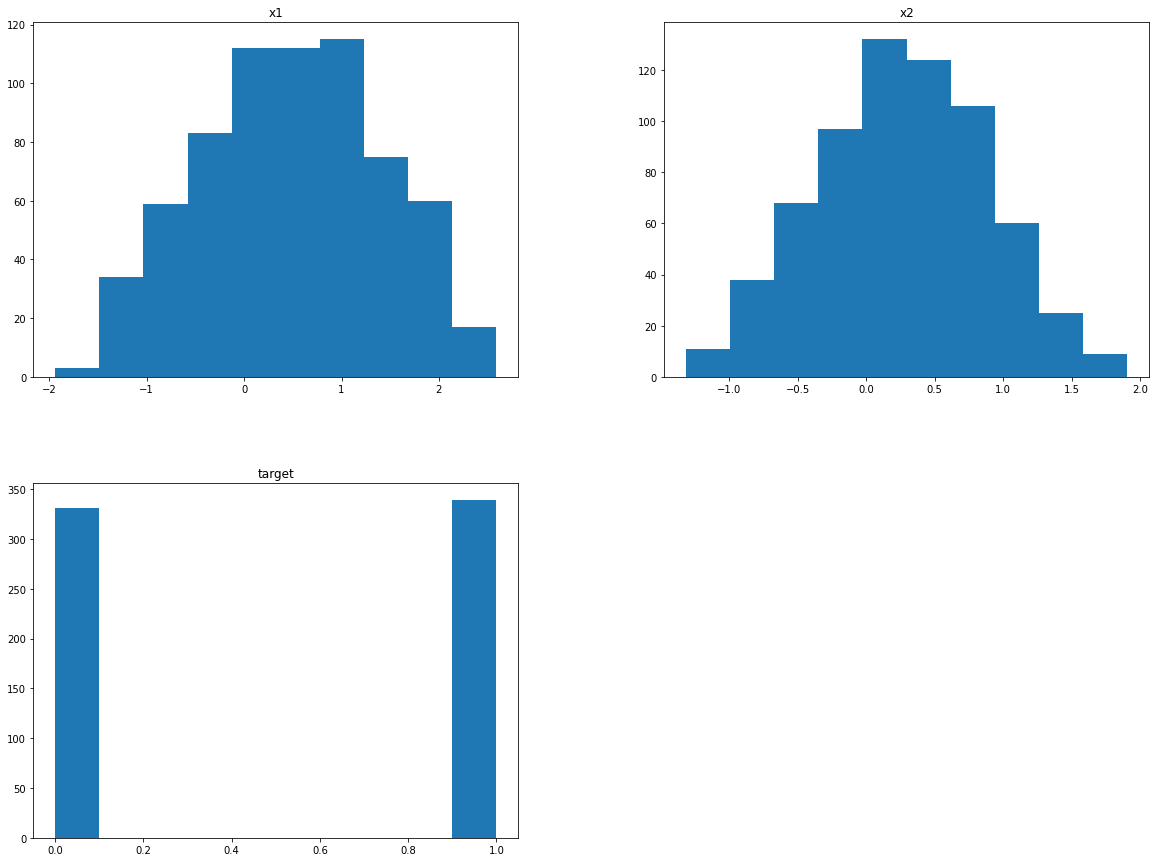

In [12]:
# verificando as distribuições
train.hist(figsize=(20,15), grid=False);

**Há outliers?**

Pela distribuição do histograma e pelo  método `describe()`, não é identificado a presença de *outliers*. 


Todavia será utilizado duas estratégias de identificar outliers:

A plotagem de **boxplots** para perceber visualmente a existência.

E adotar a estratégia conhecida como **IQR Scores** para definir os **limites superiores e inferiores** de cada variável suspeita, com a finalidade de usar os limites para **definir o corte e remover os outliers**.


Depois de realizar o **IQR Scores** nas duas variáveis (x1 w x2) foram adquiridas as seguintes informações:




Identificando outliers para variável x1


In [13]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_x1 = train.x1.quantile(.25)
q3_x1 = train.x1.quantile(.75)
iqr_x1 = q3_x1 - q1_x1
print ("O IQR da área media é: ", iqr_x1)

# definindo os limites superior e inferior da variável
sup_x1 = q3_x1 + 1.5 * iqr_x1
inf_x1 = q1_x1 - 1.5 * iqr_x1

print ("O limite superior é: ", sup_x1)
print ("O limite inferior é: ", inf_x1)

O IQR da área media é:  1.32929511455596
O limite superior é:  3.1536227549083318
O limite inferior é:  -2.163557703315508


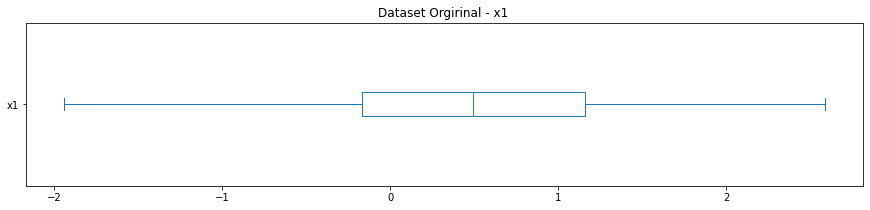

 O dataset possui 670 entradas
 0 Entradas acima de 3.1536
 Representam 0.00% do dataset


In [14]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
train.x1.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - x1 ')
plt.show()
print(" O dataset possui {} entradas".format(train.shape[0]))
print(" {} Entradas acima de 3.1536".format(len(train[train.x1 > 3.1536227549083318])))
print(" Representam {:.2f}% do dataset".format((len(train[train.x1 > 3.1536227549083318]) / train.shape[0])*100))

Identificando outliers para variável x2


In [15]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_x2 = train.x2.quantile(.25)
q3_x2 = train.x2.quantile(.75)
iqr_x2 = q3_x2 - q1_x2
print ("O IQR da área media é: ", iqr_x2)

# definindo os limites superior e inferior da variável
sup_x2 = q3_x2 + 1.5 * iqr_x2
inf_x2 = q1_x2 - 1.5 * iqr_x2

print ("O limite superior é: ", sup_x2)
print ("O limite inferior é: ", inf_x2)

O IQR da área media é:  0.8767785431171361
O limite superior é:  2.0327572832473155
O limite inferior é:  -1.4743568892212289


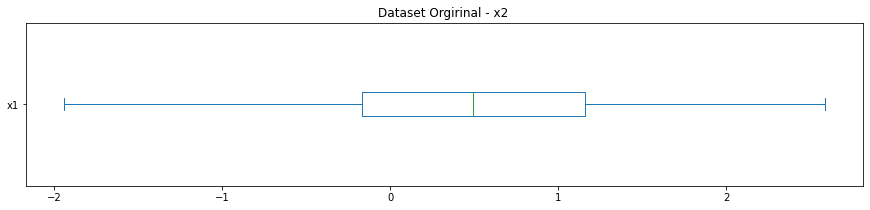

 O dataset possui 670 entradas
 0 Entradas acima de 2.0327572832473155
 Representam 0.00% do dataset


In [16]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
train.x1.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - x2 ')
plt.show()
print(" O dataset possui {} entradas".format(train.shape[0]))
print(" {} Entradas acima de 2.0327572832473155".format(len(train[train.x2 > 2.0327572832473155])))
print(" Representam {:.2f}% do dataset".format((len(train[train.x2 > 2.0327572832473155]) / train.shape[0])*100))

**Resultados Obtidos**

* `x1`
<p> O dataset possui 670 entradas</p>
<p> 0 Entradas acima de 3.1536</p>
<p> Representam 0.00% do dataset</p>


 

* `x2`
<p> O dataset possui 670 entradas</p>
<p> 0 Entradas acima de 2.0327572832473155</p>
<p>  Representam 0.00% do dataset</p>


A base não contém outliers nas variáveis verificadas

# Análise Exploratória


## Exploração estatística descritiva univariada


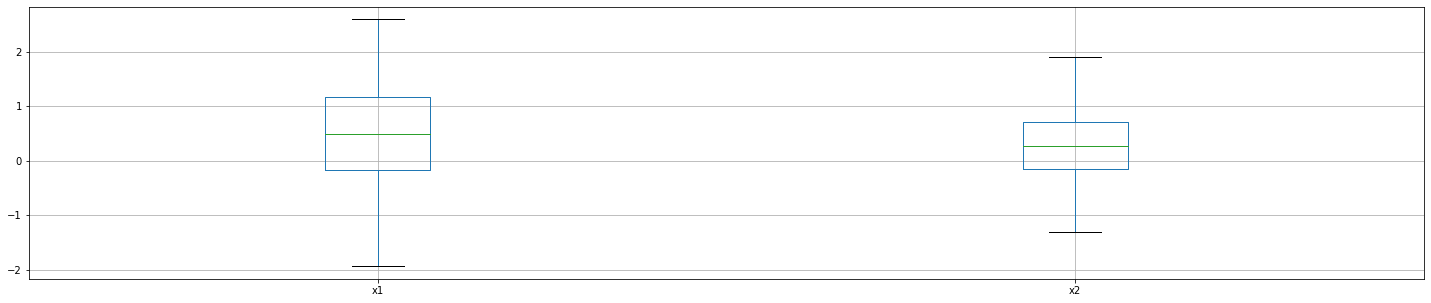

In [17]:
train.drop(columns=['target']).boxplot(figsize=(25,5))
plt.show()

De ínicio verificamos que os dados presentes em cada feature estão em escalas semelhantes, e é interessante porque não será preciso preocupa-se com a normalização dos dados na etapa do modelo de machine learning.

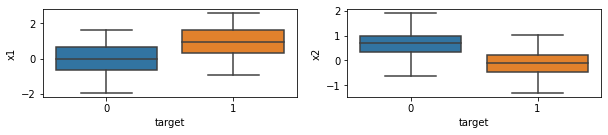

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,20))
fig.subplots_adjust(hspace=.9, wspace=0.2)
i = 1
for j,c in enumerate(train.columns): 
  if c not in ['target']:
      ax = fig.add_subplot(7, 2, i)
      sns.boxplot(x='target',y=c,data=train)
      i += 1

Não é conhecido o que a classe "0" representa e nem o que a classe "1" diz respeito.

Todavia, as representações visuais apresentadas anteriormente quando comparados as classes em derminada feature, permite apontar as seguintes conclusões:

*   A features x2 talvez seja **a preferida do nosso modelo de machine learning** porque existe uma discrepância considerável entre os quartetos do boxplot e também na mediana.


*   Já feature x1 seria utilizada pelo modelo de machine learning, todavia a mediana das classes  0 e 1, e quartetos tem proximidade de valores atribuídos para ambas classes, sendo assim **não teria tanto peso quanto o classificador**.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


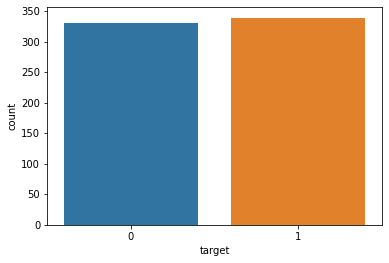

In [19]:
sns.countplot(train['target'],label="Count")

In [20]:
print(" A classe 0 representa {:.2f}% do dataset".format((len(train[train.target == 0]) / train.shape[0])*100))
print(" A classe 1 representa {:.2f}% do dataset".format((len(train[train.target == 1]) / train.shape[0])*100))

 A classe 0 representa 49.40% do dataset
 A classe 1 representa 50.60% do dataset


Nossa variavel alvo (target) possui uma distribuição considerada igualitária, ou seja não existe classe majoritária discrepante no nosso dataset.

## Exploração estatística descritiva multivariada


Agora vamos ter um primeiro entendimento das variaveis que possivelmente se correlacionam e impactam na target. Encontrar essas variáveis é de extrema importância para quando formos construir o nosso modelo.

Na análise multivariada, consideramos duas ou mais variáveis simultaneamente, e como elas se relacionam. 

Então, estamos interessados em verificar como a variação de uma variável influencia as demais e quais seus efeitos conjuntos.

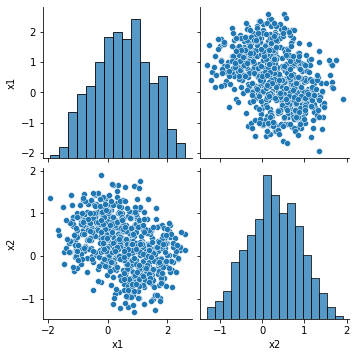

In [21]:
## GRÁFICO PARA ANALISAR A RELAÇÃO ENTRE AS VARIÁVEIS
sns.pairplot(train.drop(columns=['target']))
plt.show()

Pelo gráfico exibido anteriomente é possível compreender quais variáveis tem alta correlação entre as mesmas.  

Não é percebido que as variáveis tem alta correção entre as mesmas.

E isso é bom para o modelo de machine learning?

Concerteza, a não existência de variáveis com alta relação possibilita que o nosso modelo não sofra enviesado por causa dessa alta relação.


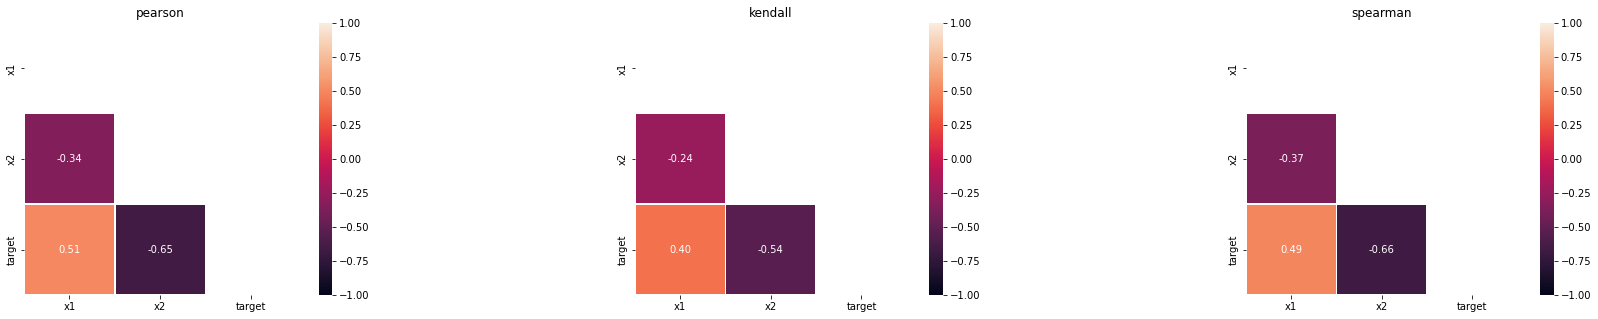

In [22]:
fig, axs = plt.subplots(1,3, figsize=(30, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.35)

corr     = train.corr()
kendall  = train.corr('kendall')
spearman = train.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

plt.show()

O mapa de calor impresso acima contém valores correlatos que pertencem a nossa variável target diagnosis.

Os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1, enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1).

Explicando o uso dos coeficientes de correlação: 

*   `Pearson`: usado para detectar a correlação entre duas variáveis quantitativas, de preferência contínuas.

*   `Spearman`: usado quando não existe normalidade ou não existe relação linear entre as variáveis. Podendo ser aplicado a variáveis continuas ou ordinais.

*   `Kendall`: usado como correlação de ranques e verifica se existe correlação entre duas variáveis ordinais. E também é usada quando não existe normalidade ou não existe relação linear entre as variáveis.

Qual se olhar as definições dos respectivos coeficientes de correlação é decidido utilizar o `Spearman` para olhar a correlação existente nas variáveis do dataset, porque nossas variáveis são ordinais.

Ao observarmos apenas o coeficiene de correlação `Spearman`, é evidente quue o nível de correlação das variáveis aceitável, e isso é verificado porque o nível de correlação das mesmas é entre -0,54 à 0.40. Desse modo, todas as variáveis serão utilizadas no modelo de machine learning:



# Modelagem


Dentre os algoritmos populares que podem ser utilizadas para o modelo de machine learning que é de classificação binária, foi tomada a decisão de usar para o problema os seguintes modelos de machine learning:

*   `Decision Trees`
*   `Logistic Regression`

**A justificativa de tal escolha é:**

*   `Logistic Regression` 
    *  É um algoritmo muito simples e eficiente, baixa variação e fornece pontuação de probabilidade para observações.

    *  Esse algoritmo não é tão interessante para lidar com um grande número de recursos categóricos, mas isso não  é nosso caso já que se trata de classificação binária. 

    *   Ele assume que os dados estão livres de valores ausentes, mas isso não é problema porque no nosso cenário não existe valores ausentes. 

*   `Decision Trees`
    *    Quando comparadas a outros algoritmos, as árvores de decisão exigem menos esforço para preparação de dados durante o pré-processamento.Eles não exigem normalização de dados e dimensionamento também. O modelo feito na árvore de decisão é muito intuitivo e fácil de explicar para as equipes técnicas e também para os stakeholders.


**E qual foram os algoritmos não escolhidos para tal problema do cenário? E porque não foram escolhidos?**

*   `Naive Bayes`
    *  Este algoritmo funciona muito rápido. Ele também pode ser usado para resolver problemas de previsão multiclasse, pois é bastante útil com eles. Porém, ele assume que todos os recursos são independentes, embora possa parecer ótimo em teoria, mas na vida real, dificilmente alguém consegue encontrar um conjunto de recursos independentes.

*   `k-Nearest Neighbors`
    *    KNN é simples e fácil de implementar. Não há necessidade de construir um modelo, ajustar vários parâmetros ou fazer suposições adicionais como alguns dos outros algoritmos de classificação. Todavia, o algoritmo fica significativamente mais lento à medida que o número de exemplos e/ou preditores/variáveis ​​independentes aumenta.


*   `Support Vector Machine`
    *    O SVM funciona relativamente bem quando há uma clara margem de separação entre as classes. Mas o SVM é mais eficaz em espaços de alta dimensão e não funciona muito bem quando o conjunto de dados tem mais ruído, ou seja, quando as classes de destino estão sobrepostas. 








Métricas para avaliação de modelo de classificação:

*   `Acurácia`: fornece uma indicação da qualidade da previsão realizada pelo modelo, sendo considerada taxa de acerto.

*   `Precision`: dos casos que previ como sendo positivos para uma classe, quantos realmente são?

*   `Recall`: dos que eram realmente positivos para uma classe, quantos eu detectei? . Sendo considerada como taxa de detecção.

*   `F1-score`: média harmônica entre precision e recall.

**Qual métrica escolher para o problema deste cenário?**

É interessante utilizar quantas métricas forem possível para ser possível visualizar o desempenho do modelo, então será utilizado todas as métricas listadas anteriormente.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

y = train['target']
X = train.drop(columns=['target'])

<bound method NDFrame.head of            x1        x2  target
0    1.934224 -0.111822       1
1    1.767383 -0.976402       1
2    0.937101 -0.085633       1
3    1.340732  0.166960       1
4   -0.199901 -0.155204       1
..        ...       ...     ...
665  0.690181 -0.800060       1
666  1.043712 -0.212964       1
667  1.821542 -0.406377       1
668  0.031938  1.424103       0
669  0.803854  0.272866       0

[670 rows x 3 columns]>

## Regressão Logística

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

### Treinamento

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.835820895522388

### Avaliação do modelo

In [26]:
## score vai de 0 a 1 (0% - 100%)
lr.score(X_val, y_val) * 100

83.5820895522388

In [27]:
from sklearn.metrics import classification_report
p = lr.predict(X_val)
print (classification_report(y_val, p))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        92
           1       0.87      0.82      0.84       109

    accuracy                           0.84       201
   macro avg       0.84      0.84      0.84       201
weighted avg       0.84      0.84      0.84       201



#### Matriz de confusão

A matriz de confusão pode ser definida como uma representação no formato de tabela para os acertos e erros de um classificador. Nela, é sumarizada as quantidades de pontos que foram corretamente classificados e os que também não foram.

A definição que veremos abaixo da matriz de confusão é uma dentre as possíves que podem ser feitas. Alguns autores utilizam a definição "transposta". Porém, isso não faz muita diferença.

In [28]:
predicao = lr.predict(X_val)
predicao

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1])

In [29]:
##MATRIZ DE CONFUSÃO DO SKLEARN
confusion_matrix(y_pred=predicao,y_true= y_val)

array([[79, 13],
       [20, 89]])

<Figure size 504x504 with 0 Axes>

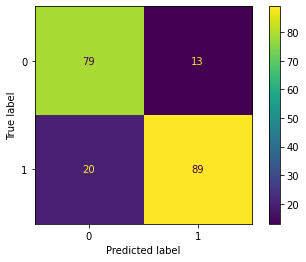

In [30]:
## PLOT MATRIZ DE CONFUSÃO DO SKLEARN
plt.figure(figsize=(7,7))
plot_confusion_matrix(lr,X_val,y_val)
plt.show()

In [31]:
## MATRIZ DE CONFUSÃO PERSONALIZADA

## calculando a matriz de confusÃo
cm = confusion_matrix(y_true=y_val,y_pred=predicao)
## calculando as % de acertos e erros para a matriz de confusÃo
percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)
percent

array([[85.86956522, 14.13043478],
       [18.34862385, 81.65137615]])

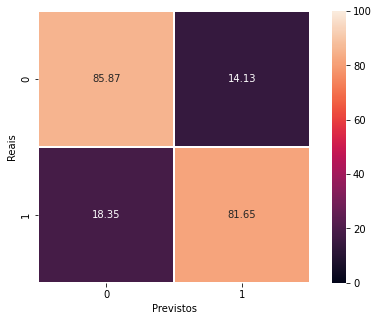

In [32]:
## MATRIZ DE CONFUSÃO PERSONALIZADA
plt.figure(figsize=(8,5))

## convertendo em dataframe
d = pd.DataFrame(percent)

## criando matriz de confusão
sns.heatmap(d, vmax=100, vmin=0, annot=True, square=True, fmt=".2f",linewidths=.5)
plt.xlabel('Previstos')
plt.ylabel('Reais')

plt.show()

In [33]:
## CALCULANDO O ACURACIA
print("ACURÁCIA: ", accuracy_score(y_pred=predicao,y_true=y_val)*100)

## CALCULANDO O F-SCORE
print("F1-SCORE: ", f1_score(y_pred=predicao,y_true=y_val,average='macro')*100)

ACURÁCIA:  83.5820895522388
F1-SCORE:  83.54135133123248


### Retreinar modelo

In [55]:
variaveis = ['x1', 'x2']

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)



p_test_ = lr.predict(test[variaveis])
print (classification_report(test['target'], p_test_))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       169
           1       0.82      0.83      0.83       161

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [58]:
confusion_matrix(y_pred=p_test_,y_true= test['target'])

array([[140,  29],
       [ 27, 134]])

## Decision Tree Classifier

In [35]:
y = train['target']
X = train.drop(columns=['target'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)


### Treinamento

In [70]:
from sklearn.tree import DecisionTreeClassifier

mdl = DecisionTreeClassifier(random_state=0, max_depth=2)
mdl.fit(X_train, y_train)


p1 = mdl.predict(X_val)
print (classification_report(y_val, p1))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        92
           1       0.82      0.94      0.88       109

    accuracy                           0.86       201
   macro avg       0.87      0.85      0.85       201
weighted avg       0.86      0.86      0.85       201



### Feature Importance

In [40]:
#Avaliando as variáveis mais importantes para o modelo
for i in zip(X.columns, mdl.feature_importances_):
  print(i)

('x1', 0.3557399002217117)
('x2', 0.6442600997782882)


### Avaliação do modelo

In [41]:
## score vai de 0 a 1 (0% - 100%)
mdl.score(X_val, y_val) * 100

85.57213930348259

In [42]:
p = mdl.predict(X_val)
print (classification_report(y_val, p))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        92
           1       0.82      0.94      0.88       109

    accuracy                           0.86       201
   macro avg       0.87      0.85      0.85       201
weighted avg       0.86      0.86      0.85       201



#### Matriz de confusão

A matriz de confusão pode ser definida como uma representação no formato de tabela para os acertos e erros de um classificador. Nela, é sumarizada as quantidades de pontos que foram corretamente classificados e os que também não foram.

A definição que veremos abaixo da matriz de confusão é uma dentre as possíves que podem ser feitas. Alguns autores utilizam a definição "transposta". Porém, isso não faz muita diferença.

In [43]:
predicao = mdl.predict(X_val)
predicao

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1])

In [44]:
##MATRIZ DE CONFUSÃO DO SKLEARN
confusion_matrix(y_pred=predicao,y_true= y_val)

array([[ 70,  22],
       [  7, 102]])

<Figure size 504x504 with 0 Axes>

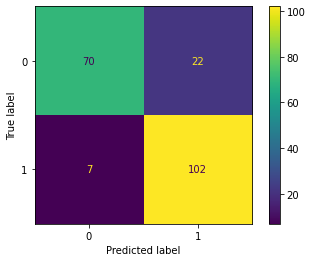

In [45]:
## PLOT MATRIZ DE CONFUSÃO DO SKLEARN
plt.figure(figsize=(7,7))
plot_confusion_matrix(mdl,X_val,y_val)
plt.show()

In [59]:
## CALCULANDO O ACURACIA
print("ACURÁCIA: ", accuracy_score(y_pred=predicao,y_true=y_val)*100)

## CALCULANDO O F-SCORE
print("F1-SCORE: ", f1_score(y_pred=predicao,y_true=y_val,average='macro')*100)

ACURÁCIA:  85.57213930348259
F1-SCORE:  85.19694237753004


### Retreinar modelo

In [51]:
variaveis = ['x1', 'x2']

In [53]:
from sklearn.tree import DecisionTreeClassifier

mdl = DecisionTreeClassifier(random_state=0, max_depth=2)
mdl.fit(X_train, y_train)


p_test = mdl.predict(test[variaveis])
print (classification_report(test['target'], p_test))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       169
           1       0.79      0.93      0.85       161

    accuracy                           0.84       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.84      0.84       330



In [57]:
confusion_matrix(y_pred=p_test,y_true= test['target'])

array([[128,  41],
       [ 11, 150]])

# Interpretação dos modelos


É percebido que o modelo de `Decision tree classifier` teve melhores resultado em relação ao modelo de `Logistic Regression`, porque quando retreinamos os dois modelos com a base de dados `teste`foi percebido que:
 
Decision Tree tem de média harmônica entre precision e recall, para:

*   classe 0 -> 0.83 
*   classe 1 -> 0.85

Já Logistic regressin tem de média harmônica entre precision e recall, para:

*   classe 0 -> 0.83
*   classe 1 -> 0.83

Com intuito de compreender mais sobre nosso modelo de árvore de decisão, já que o mesmo está com melhor desempenho, iremos decidir qual interpretador utilizar para adqurir mais conhecimento sobre o mesmo.


Precisamos torna nosso modelo de aprendizado de máquina interpretável, e pode ser usado alguma das várias bibliotecas Python para interpretar modelos de aprendizado de máquina.

Aqui estão as 4 bibliotecas Python:

*   `SHAP`
*   `Yellowbrick`
*   `Alibi`
*   `Lucid`

**Qual utilizar?**

Nosso modelo que desejamos interpretar é de árvore, e desse modo o melhor é o `SHAP`porque ele oferece um módulo especial para modelos baseados em árvore, desse modo obtiremos com eficaz e rapidez informações sobre nosso modelo de `decision tree`. E o mesmo é uma das bibliotecas mais populares para interpretabilidade, então de fato é utilizada com interpretadora.

**E qual a justificativa para não escolha das outras bibliotecas?**

*   `Lucid` se dedica expressamente ao trabalho com redes neurais e modelos de aprendizado profundo, que não é nosso caso.

*   `Alibi` a biblioteca foi projetada especificamente para modelos de caixa preta, e não tem um módulo especial para modelos baseados em árvore. Particularmente a mesma também é útil para modelos de aprendizado profundo.

*   `Yellowbrick` tem acoplado visualizadores contendo conjunto de ferramentas que nos ajudam a visualizar os recursos em nossos dados considerando pontos de dados individuais. Todavia a mesma possível recursos, como: 'Recursos de classificação' que não nos interessa nessa etapa do problema.



In [64]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import shap

In [91]:
explainer = shap.TreeExplainer(mdl) #explainer é apenas objeto do shap
shap_values = explainer.shap_values(X_train) #shap_values é uma lista de duas arrays, já que nossa classificação é binária

In [95]:
# Matriz da classe 0
shap_values[0].shape

(469, 2)

In [94]:
# Matriz da classe 1
shap_values[1].shape

(469, 2)

In [93]:
#Interpretação da nossa classe 1
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])

Utilizando o primeiro exemplo do nosso `X_train`, vemos que a probalidade de nosso exemplo ser da classe 1 é de **0.03**. Ele teve essa probabilidade porque a feature x2 contribuiu com esse valor de **1.169**.

In [98]:
#Interpretação da nossa classe 0
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][1,:], X_train.iloc[1,:])

Vendo o segundo exemplo do nosso `X_train`, vemos que a probalidade de nosso exemplo ser da classe 0 é de **0.97**. Ele teve essa probabilidade porque a feature x2 contribuiu com esse valor de **0.6727**.

In [101]:
#Interpretação da nossa classe 1

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_train)

# Eixo y é o valor da probabilidade

É percebido que quando a feature x2 passa do valor ** 0.539** a mesma já começa a diminuir drásticamente probabilidade do exemplo ser da classe 1.

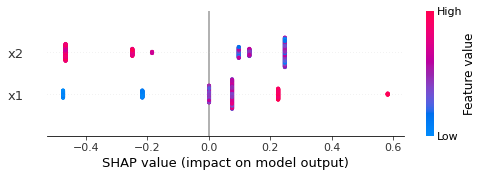

In [80]:
#Interpretação para a classe 1
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

Entre todos os exemplos, a feature mais importante pelo gráfico é a `x2`.

Quando a feature `x2` tem valor alto e `x1` tem valor baixo, diminui o impacto do modelo dizer que o exemplo se trata da classe 1.

Já quando a feature `x2` tem valor baixo e majoritariamente a `x1` tem valor alto, aumenta o impacto do modelo dizer que o exemplo se trata da classe 1.

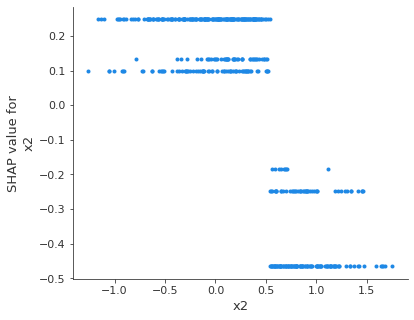

In [102]:
#Interpretação para a classe 1

shap.initjs()
shap.dependence_plot("x2",shap_values[1], X_train, interaction_index=None)

Quando a feature `x2` tem valor abaixo de **0.5**, o modelo tende a dizer que o exemplo analisado é da classe 1, mas quando o valor da feature passa de **0.5** afeta a previsão do modelo, diminuindo a probabilidade do exemplo ser de fato da classe 1.